# Нейронные сети и PyTorch

## Импорты и настройка

Импортируем все необходимые библиотеки для работы с PyTorch и визуализации.

In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

Проверяем версию PyTorch и доступность GPU:

In [2]:
print(f"PyTorch версия: {torch.__version__}")
print(f"CUDA доступна: {torch.cuda.is_available()}")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Используемое устройство: {device}")

PyTorch версия: 2.10.0+cu128
CUDA доступна: True
Используемое устройство: cuda


---

# 1. Основы PyTorch и Тензоры

PyTorch работает с **тензорами** — многомерными массивами, аналогами NumPy arrays, но с поддержкой автоградиентов и GPU.

## 1.1 Создание тензоров

Тензоры можно создавать из Python списков, случайно или специальными функциями.

In [3]:
# Из списка
x = torch.tensor([1.0, 2.0, 3.0, 4.0])
print(f"Тензор: {x}")
print(f"Shape: {x.shape}, dtype: {x.dtype}, device: {x.device}")

Тензор: tensor([1., 2., 3., 4.])
Shape: torch.Size([4]), dtype: torch.float32, device: cpu


Создание матриц и многомерных тензоров:

In [4]:
# Матрица 2x3
A = torch.tensor([[1.0, 2.0, 3.0],
                  [4.0, 5.0, 6.0]])
print(f"Матрица:\n{A}")
print(f"Shape: {A.shape}")

Матрица:
tensor([[1., 2., 3.],
        [4., 5., 6.]])
Shape: torch.Size([2, 3])


Специальные функции для создания тензоров:

In [5]:
# Нулевая матрица
zeros = torch.zeros(3, 4)
print(f"Zeros:\n{zeros}\n")

# Единичная матрица
ones = torch.ones(2, 3)
print(f"Ones:\n{ones}\n")

# Случайные значения из N(0, 1)
random = torch.randn(3, 3)
print(f"Random:\n{random}")

Zeros:
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

Ones:
tensor([[1., 1., 1.],
        [1., 1., 1.]])

Random:
tensor([[-0.3990, -0.7832,  0.2058],
        [ 2.1771,  0.2558, -0.9418],
        [-1.1359,  0.2633, -1.0355]])


## 1.2 Базовые операции

PyTorch поддерживает все стандартные математические операции.

In [6]:
# Поэлементные операции
a = torch.tensor([1.0, 2.0, 3.0])
b = torch.tensor([4.0, 5.0, 6.0])

print(f"a + b = {a + b}")
print(f"a * b = {a * b}")
print(f"a ** 2 = {a ** 2}")

a + b = tensor([5., 7., 9.])
a * b = tensor([ 4., 10., 18.])
a ** 2 = tensor([1., 4., 9.])


**Матричное умножение** — ключевая операция в нейронных сетях:

In [7]:
# Линейное преобразование: z = Wx + b
W = torch.randn(5, 3)  # Матрица весов
x = torch.randn(3)      # Входной вектор
b = torch.zeros(5)      # Bias

z = W @ x + b  # @ - оператор матричного умножения

print(f"W shape: {W.shape}")
print(f"x shape: {x.shape}")
print(f"z shape: {z.shape}")

W shape: torch.Size([5, 3])
x shape: torch.Size([3])
z shape: torch.Size([5])


## 1.3 Broadcasting

PyTorch автоматически расширяет размерности тензоров при необходимости.

In [8]:
# Батч из 32 объектов
X = torch.randn(32, 3)  # [batch_size, features]
W = torch.randn(5, 3)   # [output_dim, input_dim]
b = torch.randn(5)       # [output_dim]

# Broadcasting: b автоматически расширяется до [32, 5]
Z = X @ W.t() + b

print(f"X shape: {X.shape}")
print(f"W shape: {W.shape}")
print(f"b shape: {b.shape}")
print(f"Z shape: {Z.shape}")

X shape: torch.Size([32, 3])
W shape: torch.Size([5, 3])
b shape: torch.Size([5])
Z shape: torch.Size([32, 5])


## 1.4 Device: CPU vs GPU

Тензоры можно переносить между CPU и GPU.

In [9]:
x_cpu = torch.randn(3, 3)
print(f"Тензор на CPU: {x_cpu.device}")

if torch.cuda.is_available():
    x_gpu = x_cpu.to("cuda")
    print(f"Тензор на GPU: {x_gpu.device}")
    x_back = x_gpu.to("cpu")
    print(f"Обратно на CPU: {x_back.device}")
else:
    print("CUDA недоступна")

Тензор на CPU: cpu
Тензор на GPU: cuda:0
Обратно на CPU: cpu


---

# 2. Автоматическое Дифференцирование (Autograd)

**Autograd** — система автоматического вычисления градиентов в PyTorch.

## 2.1 Простейший пример

Создаем тензор с `requires_grad=True` для отслеживания операций.

In [10]:
x = torch.tensor(2.0, requires_grad=True)
y = x**2 + 3*x + 1

print(f"x = {x.item()}")
print(f"y = x² + 3x + 1 = {y.item()}")

x = 2.0
y = x² + 3x + 1 = 11.0


Вычисляем градиент `dy/dx = 2x + 3`:

In [11]:
y.backward()  # Вычисление градиента
print(f"dy/dx = {x.grad.item()}")
print(f"Проверка: 2*{x.item()} + 3 = {2*x.item() + 3}")

dy/dx = 7.0
Проверка: 2*2.0 + 3 = 7.0


## 2.2 Многомерный случай

Autograd работает с векторами и матрицами.

In [12]:
# Создаем веса с градиентами
W = torch.randn(3, 2, requires_grad=True)
b = torch.zeros(3, requires_grad=True)
x = torch.randn(2)

# Forward pass
z = W @ x + b
loss = (z**2).sum()

print(f"Loss: {loss.item():.4f}")

Loss: 6.1693


Вычисляем градиенты по всем параметрам:

In [13]:
loss.backward()

print(f"Градиент dL/dW:\n{W.grad}")
print(f"\nГрадиент dL/db: {b.grad}")

Градиент dL/dW:
tensor([[ 0.1612,  0.0428],
        [-4.0948, -1.0867],
        [-2.7455, -0.7286]])

Градиент dL/db: tensor([-0.1624,  4.1238,  2.7650])


## 2.3 Накопление градиентов

Важно: градиенты накапливаются при повторных вызовах `.backward()`

In [14]:
x = torch.tensor(2.0, requires_grad=True)

# Первый backward
y1 = x**2
y1.backward()
print(f"После первого backward: x.grad = {x.grad.item()}")

# Второй backward (градиенты суммируются)
y2 = 3*x
y2.backward()
print(f"После второго backward: x.grad = {x.grad.item()}")

После первого backward: x.grad = 4.0
После второго backward: x.grad = 7.0


Поэтому всегда обнуляем градиенты перед новым backward:

In [15]:
x.grad.zero_()  # Обнуление
y3 = x**3
y3.backward()
print(f"После zero_grad(): x.grad = {x.grad.item()}")

После zero_grad(): x.grad = 12.0


## 2.4 Отключение градиентов

При inference градиенты не нужны. Используем `torch.no_grad()` для экономии памяти.

In [16]:
x = torch.randn(3, requires_grad=True)

# С градиентами
y = x * 2
print(f"y.requires_grad = {y.requires_grad}")

# Без градиентов
with torch.no_grad():
    y = x * 2
    print(f"y.requires_grad (в no_grad) = {y.requires_grad}")

y.requires_grad = True
y.requires_grad (в no_grad) = False


## 2.5 Визуализация Autograd

Посмотрим на forward и backward pass графически.

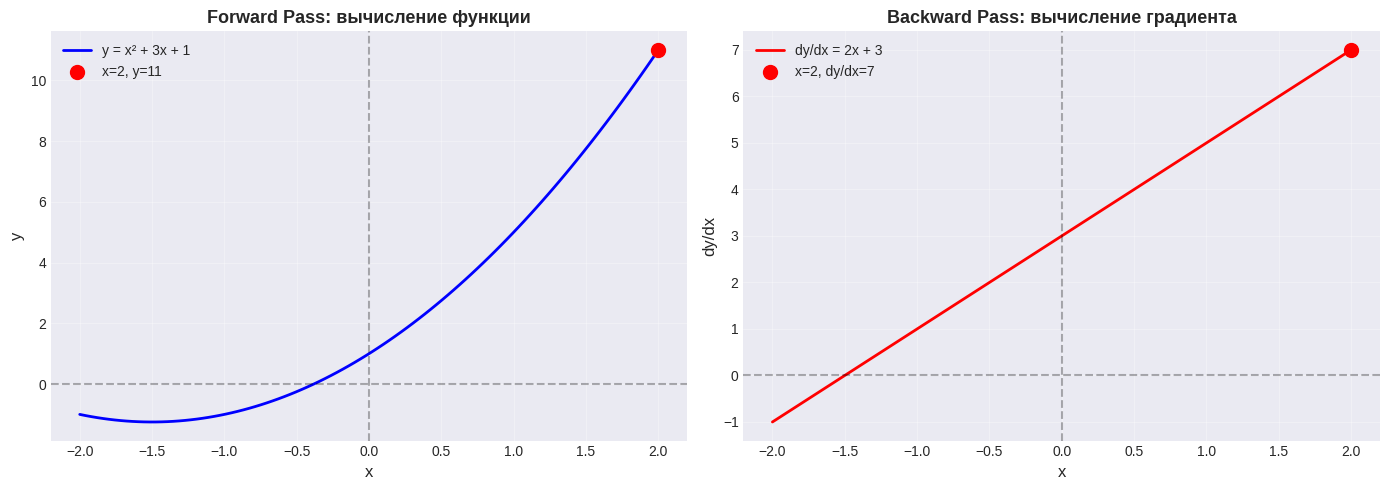

In [17]:
x_vals = np.linspace(-2, 2, 100)
y_vals = x_vals**2 + 3*x_vals + 1
dy_vals = 2*x_vals + 3

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Forward pass
ax1.plot(x_vals, y_vals, 'b-', linewidth=2, label='y = x² + 3x + 1')
ax1.scatter([2], [11], color='red', s=100, zorder=5, label='x=2, y=11')
ax1.axhline(0, color='k', linestyle='--', alpha=0.3)
ax1.axvline(0, color='k', linestyle='--', alpha=0.3)
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('y', fontsize=12)
ax1.set_title('Forward Pass: вычисление функции', fontsize=13, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Backward pass
ax2.plot(x_vals, dy_vals, 'r-', linewidth=2, label="dy/dx = 2x + 3")
ax2.scatter([2], [7], color='red', s=100, zorder=5, label='x=2, dy/dx=7')
ax2.axhline(0, color='k', linestyle='--', alpha=0.3)
ax2.axvline(0, color='k', linestyle='--', alpha=0.3)
ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel('dy/dx', fontsize=12)
ax2.set_title('Backward Pass: вычисление градиента', fontsize=13, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---

# 3. Создание Нейросетей: `nn.Sequential`

`nn.Sequential` — самый простой способ создания последовательных архитектур.

## 3.1 Бинарная классификация

Модель выдает **логит** (одно число), без sigmoid.

In [18]:
model_binary = nn.Sequential(
    nn.Linear(20, 64),      # Входной слой
    nn.ReLU(),              # Активация
    nn.Linear(64, 32),      # Скрытый слой
    nn.ReLU(),
    nn.Linear(32, 1)        # Выход: логит (без sigmoid)
)

print(model_binary)

Sequential(
  (0): Linear(in_features=20, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=1, bias=True)
)


Количество параметров в модели:

In [19]:
total_params = sum(p.numel() for p in model_binary.parameters())
print(f"Всего параметров: {total_params:,}")

for name, param in model_binary.named_parameters():
    print(f"{name:20s} | shape: {str(param.shape):15s} | params: {param.numel():,}")

Всего параметров: 3,457
0.weight             | shape: torch.Size([64, 20]) | params: 1,280
0.bias               | shape: torch.Size([64]) | params: 64
2.weight             | shape: torch.Size([32, 64]) | params: 2,048
2.bias               | shape: torch.Size([32]) | params: 32
4.weight             | shape: torch.Size([1, 32]) | params: 32
4.bias               | shape: torch.Size([1]) | params: 1


## 3.2 Многоклассовая классификация

Модель выдает **вектор логитов** (по одному на класс), без softmax.

In [20]:
num_classes = 10

model_multiclass = nn.Sequential(
    nn.Linear(20, 128),
    nn.ReLU(),
    nn.BatchNorm1d(128),    # Batch Normalization
    nn.Dropout(0.3),         # Dropout для регуляризации

    nn.Linear(128, 64),
    nn.ReLU(),
    nn.BatchNorm1d(64),
    nn.Dropout(0.2),

    nn.Linear(64, num_classes)  # Логиты для каждого класса
)

print(model_multiclass)

Sequential(
  (0): Linear(in_features=20, out_features=128, bias=True)
  (1): ReLU()
  (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Dropout(p=0.3, inplace=False)
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): ReLU()
  (6): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): Dropout(p=0.2, inplace=False)
  (8): Linear(in_features=64, out_features=10, bias=True)
)


## 3.3 Регрессия

Для регрессии выходной слой без активации.

In [21]:
model_regression = nn.Sequential(
    nn.Linear(13, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 1)  # Одно значение (без активации)
)

print(model_regression)
print(f"\nПараметров: {sum(p.numel() for p in model_regression.parameters()):,}")

Sequential(
  (0): Linear(in_features=13, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=1, bias=True)
)

Параметров: 3,009


## 3.4 Forward Pass

Пример прохода данных через модель.

In [22]:
# Батч из 5 объектов, 20 признаков
X_example = torch.randn(5, 20)

# Forward pass
with torch.no_grad():
    logits = model_binary(X_example)
    probabilities = torch.sigmoid(logits)

print(f"Вход: {X_example.shape}")
print(f"Логиты: {logits.squeeze()}")
print(f"Вероятности: {probabilities.squeeze()}")

Вход: torch.Size([5, 20])
Логиты: tensor([-0.2685, -0.1098, -0.0387, -0.0955, -0.0585])
Вероятности: tensor([0.4333, 0.4726, 0.4903, 0.4762, 0.4854])


---

# 4. Создание Нейросетей: `nn.Module`

`nn.Module` — гибкий способ для сложных архитектур с ветвлениями и кастомной логикой.

## 4.1 Базовая MLP

Создаем класс, наследующий `nn.Module`.

In [23]:
class SimpleMLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

model = SimpleMLP(input_dim=20, hidden_dim=64, output_dim=1)
print(model)

SimpleMLP(
  (fc1): Linear(in_features=20, out_features=64, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=64, out_features=1, bias=True)
)


## 4.2 Продвинутая MLP

Добавляем BatchNorm, Dropout и несколько слоев.

In [24]:
class AdvancedMLP(nn.Module):
    def __init__(self, input_dim, hidden_dims, output_dim, dropout=0.3):
        super(AdvancedMLP, self).__init__()

        layers = []
        prev_dim = input_dim

        # Скрытые слои
        for hidden_dim in hidden_dims:
            layers.append(nn.Linear(prev_dim, hidden_dim))
            layers.append(nn.BatchNorm1d(hidden_dim))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout))
            prev_dim = hidden_dim

        # Выходной слой
        layers.append(nn.Linear(prev_dim, output_dim))

        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

model = AdvancedMLP(input_dim=20, hidden_dims=[128, 64, 32], output_dim=1)
print(model)

AdvancedMLP(
  (network): Sequential(
    (0): Linear(in_features=20, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=64, out_features=32, bias=True)
    (9): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Dropout(p=0.3, inplace=False)
    (12): Linear(in_features=32, out_features=1, bias=True)
  )
)


## 4.3 Кастомная архитектура

Пример модели с двумя выходами (multi-task learning).

In [25]:
class MultiOutputNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_classes):
        super(MultiOutputNet, self).__init__()

        # Общий backbone
        self.backbone = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.BatchNorm1d(hidden_dim),
            nn.Dropout(0.2)
        )

        # Голова для классификации
        self.classifier = nn.Linear(hidden_dim, num_classes)

        # Голова для регрессии
        self.regressor = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        features = self.backbone(x)
        class_logits = self.classifier(features)
        regression_output = self.regressor(features)
        return class_logits, regression_output

model = MultiOutputNet(input_dim=20, hidden_dim=64, num_classes=3)
print(model)

MultiOutputNet(
  (backbone): Sequential(
    (0): Linear(in_features=20, out_features=64, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.2, inplace=False)
  )
  (classifier): Linear(in_features=64, out_features=3, bias=True)
  (regressor): Linear(in_features=64, out_features=1, bias=True)
)


Демонстрация работы:

In [26]:
X_demo = torch.randn(10, 20)
with torch.no_grad():
    class_out, reg_out = model(X_demo)

print(f"Вход: {X_demo.shape}")
print(f"Классификация: {class_out.shape}")
print(f"Регрессия: {reg_out.shape}")

Вход: torch.Size([10, 20])
Классификация: torch.Size([10, 3])
Регрессия: torch.Size([10, 1])


## 4.4 Sequential vs nn.Module

**Когда использовать что:**

| Характеристика | `nn.Sequential` | `nn.Module` |
|----------------|-----------------|-------------|
| Простота | Очень просто | Больше кода |
| Гибкость | Только последовательно | Любая логика |
| Ветвления | Нет | Да |
| Несколько входов | Нет | Да |
| Кастомные операции | Нет | Да |

**Рекомендация:**
- Простые архитектуры → `nn.Sequential`
- Сложные архитектуры → `nn.Module`
- Можно комбинировать оба подхода

---

# 5. Практика: Бинарная Классификация

Используем датасет **Breast Cancer** из sklearn.

## 5.1 Загрузка данных

In [27]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = load_breast_cancer()
X = data.data
y = data.target

print(f"Размер датасета: {X.shape}")
print(f"Признаков: {X.shape[1]}")
print(f"Классы: {np.bincount(y)}")

Размер датасета: (569, 30)
Признаков: 30
Классы: [212 357]


## 5.2 Предобработка

Разделяем на train/val/test и нормализуем данные.

In [28]:
# Train / Test split
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y
)

# Train / Val split
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.15, random_state=42, stratify=y_temp
)

print(f"Train: {X_train.shape[0]}")
print(f"Val:   {X_val.shape[0]}")
print(f"Test:  {X_test.shape[0]}")

Train: 410
Val:   73
Test:  86


Нормализация (важно: `fit` только на train):

In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

print("Данные нормализованы")

Данные нормализованы


## 5.3 Создание DataLoaders

In [30]:
# Конвертация в тензоры
X_train_t = torch.FloatTensor(X_train)
y_train_t = torch.FloatTensor(y_train)
X_val_t = torch.FloatTensor(X_val)
y_val_t = torch.FloatTensor(y_val)
X_test_t = torch.FloatTensor(X_test)
y_test_t = torch.FloatTensor(y_test)

# DataLoaders
train_dataset = TensorDataset(X_train_t, y_train_t)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = TensorDataset(X_val_t, y_val_t)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

print(f"Train batches: {len(train_loader)}")
print(f"Val batches: {len(val_loader)}")

Train batches: 13
Val batches: 3


## 5.4 Создание модели

Используем `nn.Module` с BatchNorm и Dropout.

In [31]:
class BinaryClassifier(nn.Module):
    def __init__(self, input_dim):
        super(BinaryClassifier, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(64, 32),
            nn.ReLU(),

            nn.Linear(32, 1)  # Логит (без sigmoid)
        )

    def forward(self, x):
        return self.network(x)

model = BinaryClassifier(input_dim=X_train.shape[1]).to(device)
print(model)
print(f"\nПараметров: {sum(p.numel() for p in model.parameters()):,}")

BinaryClassifier(
  (network): Sequential(
    (0): Linear(in_features=30, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.2, inplace=False)
    (8): Linear(in_features=64, out_features=32, bias=True)
    (9): ReLU()
    (10): Linear(in_features=32, out_features=1, bias=True)
  )
)

Параметров: 14,721


## 5.5 Loss и Optimizer

Для бинарной классификации используем `BCEWithLogitsLoss`.

In [32]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)

print(f"Loss: {criterion}")
print(f"Optimizer: {optimizer}")

Loss: BCEWithLogitsLoss()
Optimizer: AdamW (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: True
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0.0001
)


## 5.6 Цикл обучения

Обучаем с early stopping.

In [33]:
num_epochs = 100
train_losses, val_losses = [], []
train_accs, val_accs = [], []
best_val_loss = float('inf')
patience, counter = 15, 0

for epoch in range(num_epochs):
    # Training
    model.train()
    train_loss, train_correct, train_total = 0, 0, 0

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        logits = model(X_batch).squeeze()
        loss = criterion(logits, y_batch)

        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()

        train_loss += loss.item()
        preds = (torch.sigmoid(logits) > 0.5).float()
        train_correct += (preds == y_batch).sum().item()
        train_total += y_batch.size(0)

    train_loss /= len(train_loader)
    train_acc = train_correct / train_total
    train_losses.append(train_loss)
    train_accs.append(train_acc)

    # Validation
    model.eval()
    val_loss, val_correct, val_total = 0, 0, 0

    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            logits = model(X_batch).squeeze()
            loss = criterion(logits, y_batch)

            val_loss += loss.item()
            preds = (torch.sigmoid(logits) > 0.5).float()
            val_correct += (preds == y_batch).sum().item()
            val_total += y_batch.size(0)

    val_loss /= len(val_loader)
    val_acc = val_correct / val_total
    val_losses.append(val_loss)
    val_accs.append(val_acc)

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        counter = 0
        torch.save(model.state_dict(), 'best_model_bc.pth')
    else:
        counter += 1
        if counter >= patience:
            print(f"Early stopping на эпохе {epoch+1}")
            break

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1:3d} | Train Loss: {train_loss:.4f} Acc: {train_acc:.4f} | "
              f"Val Loss: {val_loss:.4f} Acc: {val_acc:.4f}")

print(f"\nЛучшая val_loss: {best_val_loss:.4f}")

Epoch  10 | Train Loss: 0.0680 Acc: 0.9805 | Val Loss: 0.0400 Acc: 0.9863
Epoch  20 | Train Loss: 0.0873 Acc: 0.9732 | Val Loss: 0.0335 Acc: 1.0000
Early stopping на эпохе 29

Лучшая val_loss: 0.0261


## 5.7 Загрузка лучшей модели и тестирование

In [34]:
model.load_state_dict(torch.load('best_model_bc.pth'))
print("Лучшая модель загружена")

Лучшая модель загружена


In [35]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix

model.eval()
with torch.no_grad():
    logits = model(X_test_t.to(device)).squeeze()
    probs = torch.sigmoid(logits).cpu().numpy()
    preds = (probs > 0.5).astype(int)

acc = accuracy_score(y_test, preds)
auc = roc_auc_score(y_test, probs)

print(f"Test Accuracy: {acc:.4f}")
print(f"Test ROC AUC:  {auc:.4f}")

Test Accuracy: 0.9767
Test ROC AUC:  0.9925


## 5.8 Визуализация результатов

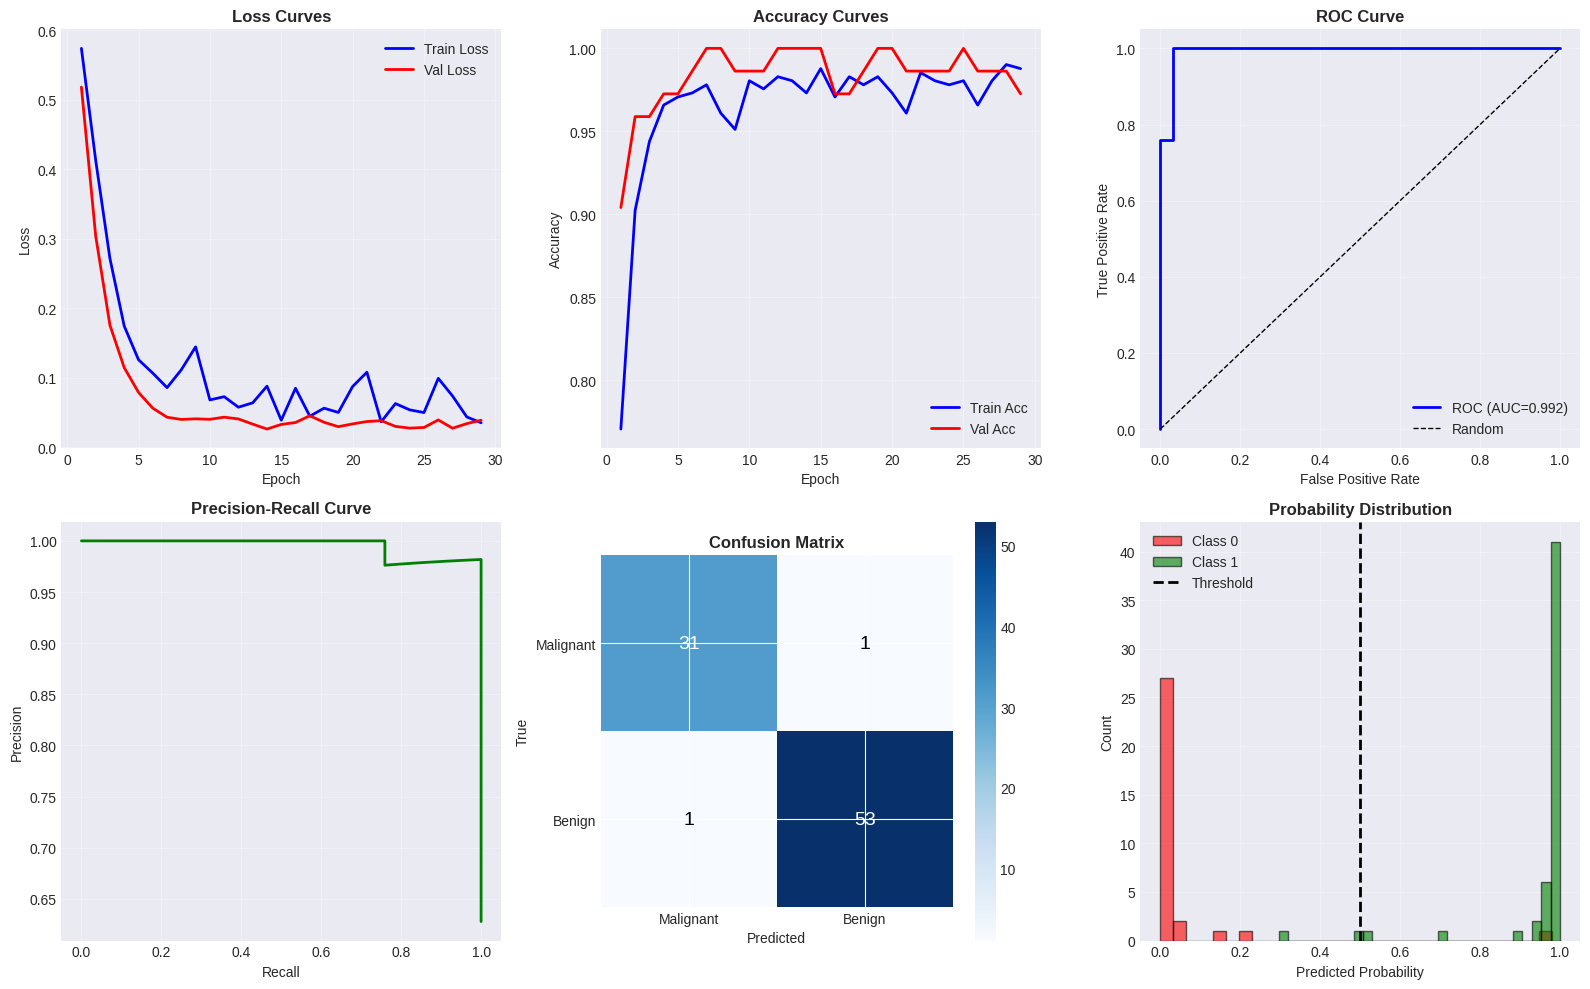

In [36]:
from sklearn.metrics import precision_recall_curve

fig = plt.figure(figsize=(16, 10))

# Loss curves
ax1 = plt.subplot(2, 3, 1)
epochs_range = range(1, len(train_losses) + 1)
ax1.plot(epochs_range, train_losses, 'b-', label='Train Loss', linewidth=2)
ax1.plot(epochs_range, val_losses, 'r-', label='Val Loss', linewidth=2)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Loss Curves', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Accuracy curves
ax2 = plt.subplot(2, 3, 2)
ax2.plot(epochs_range, train_accs, 'b-', label='Train Acc', linewidth=2)
ax2.plot(epochs_range, val_accs, 'r-', label='Val Acc', linewidth=2)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Accuracy Curves', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# ROC Curve
ax3 = plt.subplot(2, 3, 3)
fpr, tpr, _ = roc_curve(y_test, probs)
ax3.plot(fpr, tpr, 'b-', linewidth=2, label=f'ROC (AUC={auc:.3f})')
ax3.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random')
ax3.set_xlabel('False Positive Rate')
ax3.set_ylabel('True Positive Rate')
ax3.set_title('ROC Curve', fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Precision-Recall
ax4 = plt.subplot(2, 3, 4)
precision, recall, _ = precision_recall_curve(y_test, probs)
ax4.plot(recall, precision, 'g-', linewidth=2)
ax4.set_xlabel('Recall')
ax4.set_ylabel('Precision')
ax4.set_title('Precision-Recall Curve', fontweight='bold')
ax4.grid(True, alpha=0.3)

# Confusion Matrix
ax5 = plt.subplot(2, 3, 5)
cm = confusion_matrix(y_test, preds)
im = ax5.imshow(cm, cmap='Blues')
plt.colorbar(im, ax=ax5)
ax5.set_xticks([0, 1])
ax5.set_yticks([0, 1])
ax5.set_xticklabels(['Malignant', 'Benign'])
ax5.set_yticklabels(['Malignant', 'Benign'])
ax5.set_xlabel('Predicted')
ax5.set_ylabel('True')
ax5.set_title('Confusion Matrix', fontweight='bold')

for i in range(2):
    for j in range(2):
        text = ax5.text(j, i, str(cm[i, j]), ha="center", va="center",
                       color="white" if cm[i, j] > cm.max()/2 else "black", fontsize=14)

# Probability distribution
ax6 = plt.subplot(2, 3, 6)
ax6.hist(probs[y_test == 0], bins=30, alpha=0.6, label='Class 0', color='red', edgecolor='black')
ax6.hist(probs[y_test == 1], bins=30, alpha=0.6, label='Class 1', color='green', edgecolor='black')
ax6.axvline(0.5, color='black', linestyle='--', linewidth=2, label='Threshold')
ax6.set_xlabel('Predicted Probability')
ax6.set_ylabel('Count')
ax6.set_title('Probability Distribution', fontweight='bold')
ax6.legend()
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---

# 6. Практика: Многоклассовая Классификация

Используем датасет **Wine** из sklearn (3 класса вин).

## 6.1 Загрузка и предобработка

In [37]:
from sklearn.datasets import load_wine

data = load_wine()
X_wine = data.data
y_wine = data.target

print(f"Размер: {X_wine.shape}")
print(f"Классов: {len(np.unique(y_wine))}")
print(f"Распределение: {np.bincount(y_wine)}")

Размер: (178, 13)
Классов: 3
Распределение: [59 71 48]


In [38]:
y_wine

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [39]:
# Разделение
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(
    X_wine, y_wine, test_size=0.2, random_state=42, stratify=y_wine
)
X_train_w, X_val_w, y_train_w, y_val_w = train_test_split(
    X_train_w, y_train_w, test_size=0.2, random_state=42, stratify=y_train_w
)

# Нормализация
scaler_w = StandardScaler()
X_train_w = scaler_w.fit_transform(X_train_w)
X_val_w = scaler_w.transform(X_val_w)
X_test_w = scaler_w.transform(X_test_w)

print("Train/Val/Test готовы")

Train/Val/Test готовы


## 6.2 DataLoaders

In [40]:
# Тензоры
X_train_w_t = torch.FloatTensor(X_train_w)
y_train_w_t = torch.LongTensor(y_train_w)  # LongTensor для классов
X_val_w_t = torch.FloatTensor(X_val_w)
y_val_w_t = torch.LongTensor(y_val_w)
X_test_w_t = torch.FloatTensor(X_test_w)

# DataLoaders
train_dataset_w = TensorDataset(X_train_w_t, y_train_w_t)
train_loader_w = DataLoader(train_dataset_w, batch_size=16, shuffle=True)
val_dataset_w = TensorDataset(X_val_w_t, y_val_w_t)
val_loader_w = DataLoader(val_dataset_w, batch_size=16, shuffle=False)

print("DataLoaders созданы")

DataLoaders созданы


## 6.3 Модель для многоклассовой классификации

Выход: вектор логитов (без softmax).

In [41]:
class MultiClassClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(MultiClassClassifier, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(32, num_classes)  # Логиты
        )

    def forward(self, x):
        return self.network(x)

model_wine = MultiClassClassifier(input_dim=X_train_w.shape[1], num_classes=3).to(device)
print(model_wine)

MultiClassClassifier(
  (network): Sequential(
    (0): Linear(in_features=13, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=32, out_features=3, bias=True)
  )
)


## 6.4 Loss и Optimizer

Для многоклассовой используем `CrossEntropyLoss`.

In [42]:
criterion_wine = nn.CrossEntropyLoss()
optimizer_wine = optim.AdamW(model_wine.parameters(), lr=0.001, weight_decay=1e-4)

print("Loss и Optimizer готовы")

Loss и Optimizer готовы


## 6.5 Обучение

In [54]:
num_epochs = 150
train_losses_w, val_losses_w = [], []
train_accs_w, val_accs_w = [], []
best_val_acc = 0
patience_w, counter_w = 20, 0

for epoch in range(num_epochs):
    # Training
    model_wine.train()
    train_loss, train_correct, train_total = 0, 0, 0

    for X_batch, y_batch in train_loader_w:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        logits = model_wine(X_batch)
        loss = criterion_wine(logits, y_batch)

        optimizer_wine.zero_grad()
        loss.backward()
        optimizer_wine.step()

        train_loss += loss.item()
        _, preds = torch.max(logits, 1)
        train_correct += (preds == y_batch).sum().item()
        train_total += y_batch.size(0)

    train_loss /= len(train_loader_w)
    train_acc = train_correct / train_total
    train_losses_w.append(train_loss)
    train_accs_w.append(train_acc)

    # Validation
    model_wine.eval()
    val_loss, val_correct, val_total = 0, 0, 0

    with torch.no_grad():
        for X_batch, y_batch in val_loader_w:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            logits = model_wine(X_batch)
            loss = criterion_wine(logits, y_batch)

            val_loss += loss.item()
            _, preds = torch.max(logits, 1)
            val_correct += (preds == y_batch).sum().item()
            val_total += y_batch.size(0)

    val_loss /= len(val_loader_w)
    val_acc = val_correct / val_total
    val_losses_w.append(val_loss)
    val_accs_w.append(val_acc)

    # Early stopping
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        counter_w = 0
        torch.save(model_wine.state_dict(), 'best_model_wine.pth')
    else:
        counter_w += 1
        if counter_w >= patience_w:
            print(f"Early stopping на эпохе {epoch+1}")
            break

    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1:3d} | Train Loss: {train_loss:.4f} Acc: {train_acc:.4f} | "
              f"Val Loss: {val_loss:.4f} Acc: {val_acc:.4f}")

print(f"\nЛучшая val_acc: {best_val_acc:.4f}")

Epoch  20 | Train Loss: 0.0470 Acc: 0.9912 | Val Loss: 0.0538 Acc: 1.0000
Early stopping на эпохе 21

Лучшая val_acc: 1.0000


## 6.6 Тестирование

In [44]:
from sklearn.metrics import classification_report

model_wine.load_state_dict(torch.load('best_model_wine.pth'))
model_wine.eval()

with torch.no_grad():
    logits = model_wine(X_test_w_t.to(device))
    _, preds = torch.max(logits, 1)
    preds = preds.cpu().numpy()

acc_wine = accuracy_score(y_test_w, preds)
print(f"Test Accuracy: {acc_wine:.4f}\n")
print("Classification Report:")
print(classification_report(y_test_w, preds, target_names=data.target_names))

Test Accuracy: 0.9722

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      0.92      0.96        12
     class_1       0.93      1.00      0.97        14
     class_2       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



## 6.7 Визуализация

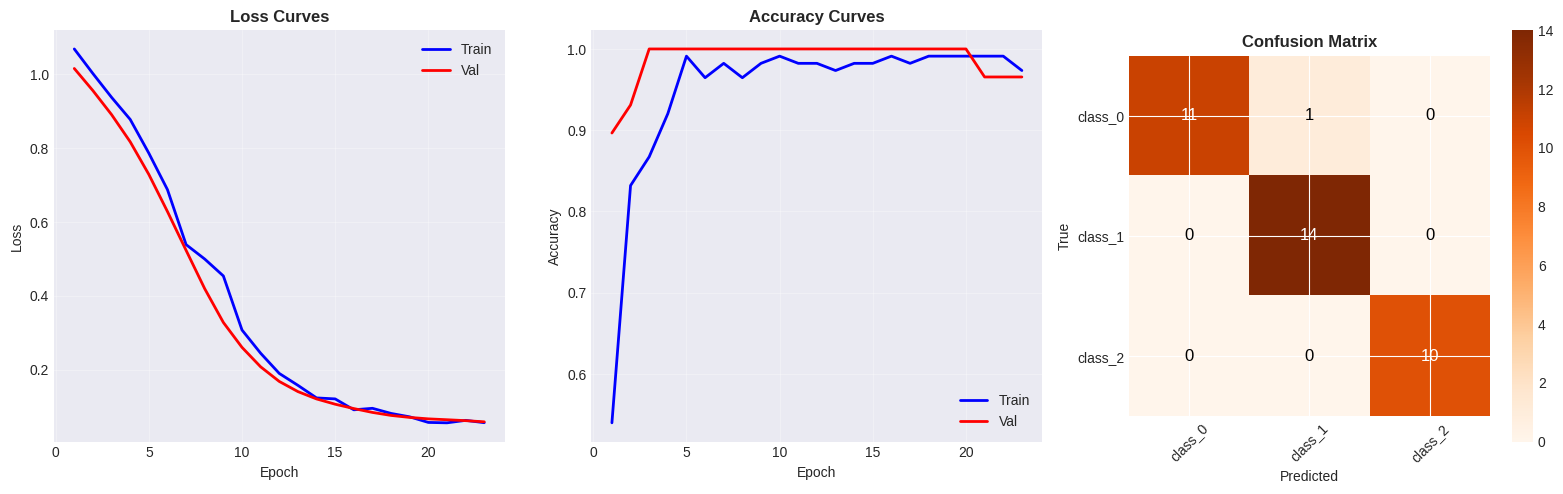

In [45]:
fig = plt.figure(figsize=(16, 5))

# Loss
ax1 = plt.subplot(1, 3, 1)
epochs_range_w = range(1, len(train_losses_w) + 1)
ax1.plot(epochs_range_w, train_losses_w, 'b-', label='Train', linewidth=2)
ax1.plot(epochs_range_w, val_losses_w, 'r-', label='Val', linewidth=2)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Loss Curves', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Accuracy
ax2 = plt.subplot(1, 3, 2)
ax2.plot(epochs_range_w, train_accs_w, 'b-', label='Train', linewidth=2)
ax2.plot(epochs_range_w, val_accs_w, 'r-', label='Val', linewidth=2)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Accuracy Curves', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Confusion Matrix
ax3 = plt.subplot(1, 3, 3)
cm_w = confusion_matrix(y_test_w, preds)
im = ax3.imshow(cm_w, cmap='Oranges')
plt.colorbar(im, ax=ax3)
ax3.set_xticks(range(3))
ax3.set_yticks(range(3))
ax3.set_xticklabels(data.target_names, rotation=45)
ax3.set_yticklabels(data.target_names)
ax3.set_xlabel('Predicted')
ax3.set_ylabel('True')
ax3.set_title('Confusion Matrix', fontweight='bold')

for i in range(3):
    for j in range(3):
        text = ax3.text(j, i, str(cm_w[i, j]), ha="center", va="center",
                       color="white" if cm_w[i, j] > cm_w.max()/2 else "black", fontsize=12)

plt.tight_layout()
plt.show()

---

# 7. Практика: Регрессия

Используем датасет **Diabetes** из sklearn.

## 7.1 Загрузка данных

In [46]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error, r2_score

data_diab = load_diabetes()
X_diab = data_diab.data
y_diab = data_diab.target

print(f"Размер: {X_diab.shape}")
print(f"Целевая переменная (прогрессирование диабета): [{y_diab.min():.1f}, {y_diab.max():.1f}]")

Размер: (442, 10)
Целевая переменная (прогрессирование диабета): [25.0, 346.0]


## 7.2 Предобработка

In [47]:
# Разделение
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(
    X_diab, y_diab, test_size=0.2, random_state=42
)
X_train_d, X_val_d, y_train_d, y_val_d = train_test_split(
    X_train_d, y_train_d, test_size=0.2, random_state=42
)

# Нормализация входов
scaler_d = StandardScaler()
X_train_d = scaler_d.fit_transform(X_train_d)
X_val_d = scaler_d.transform(X_val_d)
X_test_d = scaler_d.transform(X_test_d)

# Нормализация целевой переменной (опционально, но помогает)
y_scaler = StandardScaler()
y_train_d_scaled = y_scaler.fit_transform(y_train_d.reshape(-1, 1)).ravel()
y_val_d_scaled = y_scaler.transform(y_val_d.reshape(-1, 1)).ravel()
y_test_d_scaled = y_scaler.transform(y_test_d.reshape(-1, 1)).ravel()

print("Данные нормализованы")

Данные нормализованы


## 7.3 DataLoaders

In [48]:
# Тензоры
X_train_d_t = torch.FloatTensor(X_train_d)
y_train_d_t = torch.FloatTensor(y_train_d_scaled)
X_val_d_t = torch.FloatTensor(X_val_d)
y_val_d_t = torch.FloatTensor(y_val_d_scaled)
X_test_d_t = torch.FloatTensor(X_test_d)

# DataLoaders
train_dataset_d = TensorDataset(X_train_d_t, y_train_d_t)
train_loader_d = DataLoader(train_dataset_d, batch_size=32, shuffle=True)
val_dataset_d = TensorDataset(X_val_d_t, y_val_d_t)
val_loader_d = DataLoader(val_dataset_d, batch_size=32, shuffle=False)

print("DataLoaders готовы")

DataLoaders готовы


## 7.4 Модель для регрессии

Выход: одно число (без активации).

In [49]:
class RegressionNet(nn.Module):
    def __init__(self, input_dim):
        super(RegressionNet, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.1),

            nn.Linear(32, 1)  # Один выход
        )

    def forward(self, x):
        return self.network(x)

model_reg = RegressionNet(input_dim=X_train_d.shape[1]).to(device)
print(model_reg)

RegressionNet(
  (network): Sequential(
    (0): Linear(in_features=10, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.1, inplace=False)
    (6): Linear(in_features=32, out_features=1, bias=True)
  )
)


## 7.5 Loss и Optimizer

Для регрессии используем `MSELoss`.

In [50]:
criterion_reg = nn.MSELoss()
optimizer_reg = optim.AdamW(model_reg.parameters(), lr=0.001, weight_decay=1e-4)

print("Loss и Optimizer готовы")

Loss и Optimizer готовы


## 7.6 Обучение

In [51]:
num_epochs_reg = 200
train_losses_reg, val_losses_reg = [], []
best_val_loss_reg = float('inf')
patience_reg, counter_reg = 30, 0

for epoch in range(num_epochs_reg):
    # Training
    model_reg.train()
    train_loss = 0

    for X_batch, y_batch in train_loader_d:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        predictions = model_reg(X_batch).squeeze()
        loss = criterion_reg(predictions, y_batch)

        optimizer_reg.zero_grad()
        loss.backward()
        optimizer_reg.step()

        train_loss += loss.item()

    train_loss /= len(train_loader_d)
    train_losses_reg.append(train_loss)

    # Validation
    model_reg.eval()
    val_loss = 0

    with torch.no_grad():
        for X_batch, y_batch in val_loader_d:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            predictions = model_reg(X_batch).squeeze()
            loss = criterion_reg(predictions, y_batch)
            val_loss += loss.item()

    val_loss /= len(val_loader_d)
    val_losses_reg.append(val_loss)

    # Early stopping
    if val_loss < best_val_loss_reg:
        best_val_loss_reg = val_loss
        counter_reg = 0
        torch.save(model_reg.state_dict(), 'best_model_reg.pth')
    else:
        counter_reg += 1
        if counter_reg >= patience_reg:
            print(f"Early stopping на эпохе {epoch+1}")
            break

    if (epoch + 1) % 25 == 0:
        print(f"Epoch {epoch+1:3d} | Train MSE: {train_loss:.4f} | Val MSE: {val_loss:.4f}")

print(f"\nЛучшая val_mse: {best_val_loss_reg:.4f}")

Epoch  25 | Train MSE: 0.4202 | Val MSE: 0.4064
Early stopping на эпохе 50

Лучшая val_mse: 0.4055


## 7.7 Тестирование

In [52]:
model_reg.load_state_dict(torch.load('best_model_reg.pth'))
model_reg.eval()

with torch.no_grad():
    preds_scaled = model_reg(X_test_d_t.to(device)).squeeze().cpu().numpy()

# Обратное преобразование
preds = y_scaler.inverse_transform(preds_scaled.reshape(-1, 1)).ravel()

mse = mean_squared_error(y_test_d, preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_d, preds)

print(f"Test MSE:  {mse:.2f}")
print(f"Test RMSE: {rmse:.2f}")
print(f"Test R²:   {r2:.4f}")

Test MSE:  2614.12
Test RMSE: 51.13
Test R²:   0.5066


## 7.8 Визуализация

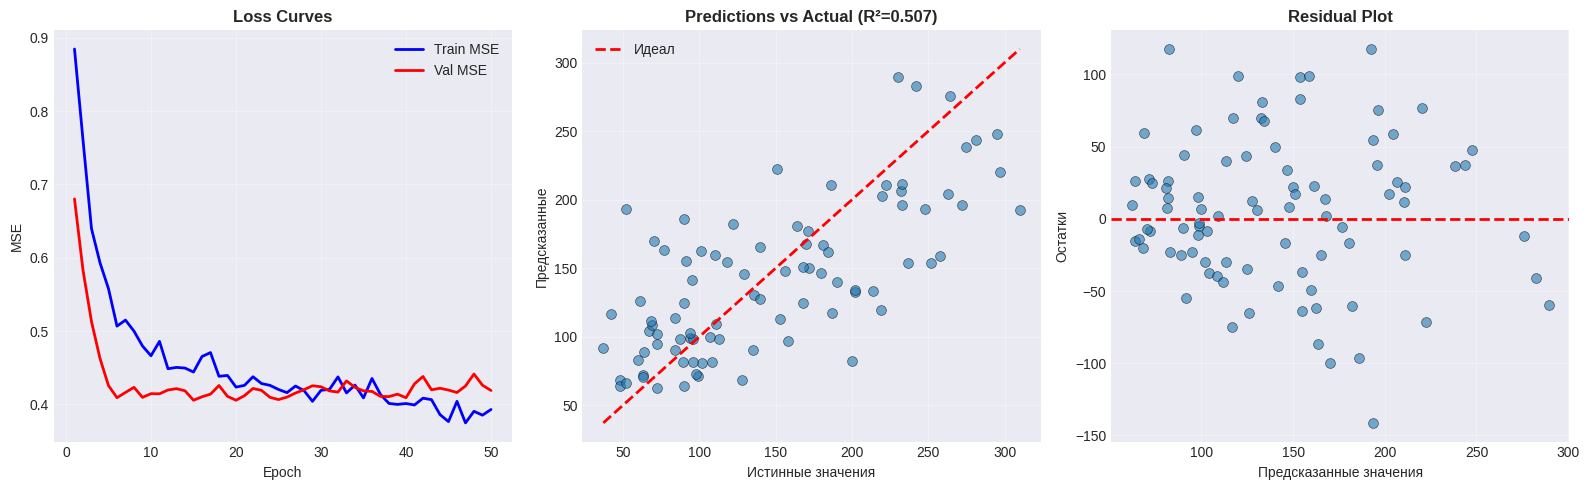

In [53]:
fig = plt.figure(figsize=(16, 5))

# Loss
ax1 = plt.subplot(1, 3, 1)
epochs_range_reg = range(1, len(train_losses_reg) + 1)
ax1.plot(epochs_range_reg, train_losses_reg, 'b-', label='Train MSE', linewidth=2)
ax1.plot(epochs_range_reg, val_losses_reg, 'r-', label='Val MSE', linewidth=2)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('MSE')
ax1.set_title('Loss Curves', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Predictions vs Actual
ax2 = plt.subplot(1, 3, 2)
ax2.scatter(y_test_d, preds, alpha=0.6, s=50, edgecolor='black', linewidth=0.5)
min_val = min(y_test_d.min(), preds.min())
max_val = max(y_test_d.max(), preds.max())
ax2.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Идеал')
ax2.set_xlabel('Истинные значения')
ax2.set_ylabel('Предсказанные')
ax2.set_title(f'Predictions vs Actual (R²={r2:.3f})', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Residuals
ax3 = plt.subplot(1, 3, 3)
residuals = y_test_d - preds
ax3.scatter(preds, residuals, alpha=0.6, s=50, edgecolor='black', linewidth=0.5)
ax3.axhline(0, color='red', linestyle='--', linewidth=2)
ax3.set_xlabel('Предсказанные значения')
ax3.set_ylabel('Остатки')
ax3.set_title('Residual Plot', fontweight='bold')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---

# 8. Основные рекомендации

### 1. Предобработка данных
- Всегда нормализуйте/стандартизируйте
- `fit()` только на train, `transform()` на val/test
- Для регрессии можно нормализовать и целевую переменную

### 2. Loss функции
```python
# Бинарная классификация (логит без sigmoid)
criterion = nn.BCEWithLogitsLoss()

# Многоклассовая (логиты без softmax)
criterion = nn.CrossEntropyLoss()

# Регрессия
criterion = nn.MSELoss()
```

### 3. Цикл обучения
```python
model.train()
for X_batch, y_batch in train_loader:
    predictions = model(X_batch)
    loss = criterion(predictions, y_batch)

    optimizer.zero_grad()  # Важно
    loss.backward()
    optimizer.step()
```

### 4. Регуляризация
- **Dropout** (0.2-0.5) — против переобучения
- **BatchNorm** — стабилизирует обучение
- **Weight Decay** — через optimizer
- **Early Stopping** — обязателен

### 5. Типичные ошибки

Не делайте:
- Sigmoid перед `BCEWithLogitsLoss`
- Softmax перед `CrossEntropyLoss`
- Забывать `optimizer.zero_grad()`
- Забывать `model.eval()` при валидации
- `fit` scaler на всех данных
- Смешивать CPU и GPU тензоры

Делайте:
- Используйте `BCEWithLogitsLoss` и `CrossEntropyLoss`
- Всегда вызывайте `zero_grad()`
- Переключайте `train()` / `eval()`
- `torch.no_grad()` при inference
- Сохраняйте лучшую модель, не последнюю
- Визуализируйте результаты

### 6. Debugging
- Проверяйте `shapes` тензоров
- Убедитесь что loss падает на маленькой выборке
- Если `NaN`: уменьшите `lr`, проверьте нормализацию
- Используйте `gradient clipping` при нестабильности

### 7. Архитектура для табличных данных
- 2-4 скрытых слоя обычно достаточно
- Размеры: 128 → 64 → 32 (убывающие)
- ReLU для скрытых слоев
- BatchNorm после Linear слоев
- Dropout 0.2-0.5

### 8. Оптимизаторы
- **AdamW** — хороший выбор для старта (lr ≈ 0.001)
- **SGD + Momentum** — для финальной настройки
- Weight decay обычно 1e-4

### 9. Метрики
- **Классификация**: Accuracy, Precision, Recall, F1, ROC AUC
- **Регрессия**: MSE, RMSE, MAE, R²
- Всегда используйте confusion matrix
- Визуализируйте loss curves

---

## Итоговая схема работы

```
1. Загрузка данных
   ↓
2. Предобработка (StandardScaler, train/val/test split)
   ↓
3. Создание TensorDataset и DataLoader
   ↓
4. Определение модели (Sequential или nn.Module)
   ↓
5. Loss + Optimizer
   ↓
6. Цикл обучения (train + validation)
   ↓
7. Early stopping
   ↓
8. Загрузка лучшей модели
   ↓
9. Тестирование
   ↓
10. Визуализация результатов
```